In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from glob import glob
import os

In [6]:
files = glob('/goofys/projects/SSI/testing/reports_final/' + '/*.csv')
fproc = list(map(os.path.basename, files))
fproc = [('_'.join(f.split('_')[: -1]), f[:-4].split('_')[-1]) for f in fproc]
fproc

[('adult_mouse_brain_B5', 'CoDi'),
 ('adult_mouse_brain_B5', 'cell2location'),
 ('adult_mouse_brain_B5', 'cytospace'),
 ('adult_mouse_brain_B5', 'seurat'),
 ('adult_mouse_brain_B5', 'tangram'),
 ('mouse_kidney', 'CoDi'),
 ('mouse_kidney', 'cell2location'),
 ('mouse_kidney', 'cytospace'),
 ('mouse_kidney', 'seurat'),
 ('mouse_kidney', 'tangram'),
 ('visium_mouse_brain', 'CoDi'),
 ('visium_mouse_brain', 'cell2location'),
 ('visium_mouse_brain', 'cytospace'),
 ('visium_mouse_brain', 'seurat'),
 ('visium_mouse_brain', 'tangram'),
 ('whole_brain_mouse_embryo', 'CoDi'),
 ('whole_brain_mouse_embryo', 'cell2location'),
 ('whole_brain_mouse_embryo', 'cytospace'),
 ('whole_brain_mouse_embryo', 'seurat'),
 ('whole_brain_mouse_embryo', 'tangram')]

In [7]:
scores_dict = {'top 100 marker genes': [['tangram', [0, 0, 0, 0]],
          ['cytospace', [0, 0, 0, 0]],
          ['seurat', [0, 0, 0, 0]],
          ['cell2location', [0, 0, 0, 0]],
          ['CoDi', [0, 0, 0, 0]]],
               'unique marker genes': [['tangram', [0, 0, 0, 0]],
          ['cytospace', [0, 0, 0, 0]],
          ['seurat', [0, 0, 0, 0]],
          ['cell2location', [0, 0, 0, 0]],
          ['CoDi', [0, 0, 0, 0]]]}
samples_dict = {'adult_mouse_brain_B5':0, 'whole_brain_mouse_embryo':1, 'visium_mouse_brain':2, 'mouse_kidney':3}
tools_dict = {'tangram': 0, 'cytospace': 1, 'seurat': 2, 'cell2location': 3, 'CoDi':4}

for path, tup in zip(files, fproc):
    df = pd.read_csv(path).set_index('retention type')
    for metric in ['top 100 marker genes', 'unique marker genes']:
        scores_dict[metric][tools_dict[tup[1]]][1][samples_dict[tup[0]]] = df.loc[metric, 'retention percentage']
scores_dict

{'top 100 marker genes': [['tangram', [64.0, 50.25, 54.15, 71.73]],
  ['cytospace', [67.7, 62.06, 54.74, 70.34]],
  ['seurat', [66.66, 67.31, 61.68, 74.19]],
  ['cell2location', [73.71, 64.94, 9.74, 65.43]],
  ['CoDi', [78.91, 74.14, 74.89, 72.86]]],
 'unique marker genes': [['tangram', [44.5, 27.54, 35.2, 30.85]],
  ['cytospace', [47.48, 41.81, 35.21, 26.75]],
  ['seurat', [40.24, 49.39, 42.82, 49.84]],
  ['cell2location', [45.29, 33.93, 8.83, 41.67]],
  ['CoDi', [60.26, 54.3, 58.5, 48.26]]]}

In [15]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker
# https://gallery.pyecharts.org/#/Bar/bar_markpoint_type
# ds = ['Adult mouse brain B5 (stereo-seq)', 'Whole brain mouse embryo (stereo-seq)', 'Mouse brain (10x Visium)', 'Mouse kidney (Slide-seq V2)']
ds = ['Adult mouse brain B5', 'Embryo mouse brain', 'Mouse brain (10x)', 'Mouse kidney']

metric_dict = {'top 100 marker genes': 'top 100', 'unique marker genes': 'non-ubiquitous'}
for metric, scores in scores_dict.items():
    bar = Bar().add_xaxis(ds)
    bar.set_global_opts(title_opts=opts.TitleOpts(title=f'Retention % of \n{metric_dict[metric]} scRNA genes'))
    for yAxis in scores:
        bar.add_yaxis(*yAxis)
        
    mark_point_datas = []
    for i in range(len(ds)):
        for j in range(len(scores)):
            print([i * len(scores) + j, scores[j][1][i]], scores[j][1][i])
            mark_point_datas.append(opts.MarkPointItem(name=f"", coord=[(i, j), scores[j][1][i]], value=scores[j][1][i], symbol_size=55))  # symbol='circle'
    # mark_point_datas = np.reshape(mark_point_datas, (len(ds), len(scores))).tolist()
    # bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False), markpoint_opts=opts.MarkPointOpts(data=mark_point_datas))
    bar.render(metric + ".html")


[0, 64.0] 64.0
[1, 67.7] 67.7
[2, 66.66] 66.66
[3, 73.71] 73.71
[4, 78.91] 78.91
[5, 50.25] 50.25
[6, 62.06] 62.06
[7, 67.31] 67.31
[8, 64.94] 64.94
[9, 74.14] 74.14
[10, 54.15] 54.15
[11, 54.74] 54.74
[12, 61.68] 61.68
[13, 9.74] 9.74
[14, 74.89] 74.89
[15, 71.73] 71.73
[16, 70.34] 70.34
[17, 74.19] 74.19
[18, 65.43] 65.43
[19, 72.86] 72.86
[0, 44.5] 44.5
[1, 47.48] 47.48
[2, 40.24] 40.24
[3, 45.29] 45.29
[4, 60.26] 60.26
[5, 27.54] 27.54
[6, 41.81] 41.81
[7, 49.39] 49.39
[8, 33.93] 33.93
[9, 54.3] 54.3
[10, 35.2] 35.2
[11, 35.21] 35.21
[12, 42.82] 42.82
[13, 8.83] 8.83
[14, 58.5] 58.5
[15, 30.85] 30.85
[16, 26.75] 26.75
[17, 49.84] 49.84
[18, 41.67] 41.67
[19, 48.26] 48.26


In [9]:
mark_point_datas

In [57]:
scores


[['tangram', [64.0, 50.25, 54.15, 71.73]],
 ['cytospace', [67.7, 62.06, 54.74, 70.34]],
 ['seurat', [66.66, 67.31, 61.68, 74.19]],
 ['cell2location', [73.71, 64.94, 9.74, 65.43]],
 ['CoDi', [78.91, 74.14, 74.89, 72.86]]]

In [7]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
from pyecharts.faker import Faker


c = Funnel().add(
    "text",
    [list(z) for z in zip(Faker.choose(), Faker.values())],
    sort_="ascending",
    label_opts=opts.LabelOpts(position=0),

).add(
    "text2",
    [list(z) for z in zip(Faker.choose(), Faker.values())],
    sort_="ascending",
    label_opts=opts.LabelOpts(position=1),

).set_global_opts(title_opts=opts.TitleOpts(title="Funnel-Sort（ascending）")).render("funnel_sort_ascending.html")
    
# Configure Appearance
# c.set_global_opts(
#     title_opts=opts.TitleOpts(title="Multiple Funnel Plots"),
#     graphic_opts=[
#         opts.GraphicGroup(
#             graphic_item=opts.GraphicItem(
#                 rotation=0, left="75%", top="15%", z=100, bounding="raw"
#             ),
#             children=[
#                 opts.GraphicRect(
#                     graphic_item=opts.GraphicItem(left="center", top="center", z=100),
#                     graphic_shape_opts=opts.GraphicShapeOpts(
#                         width=400, height=300
#                     ),
#                 )
#             ],
#         )
#     ],
# )
# c.render("funnel_sort_ascending.html")

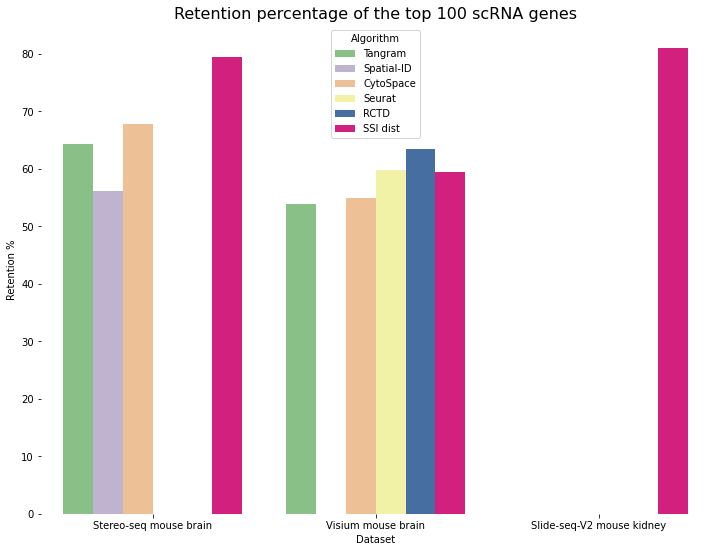

In [39]:
tools = ['Tangram', 'Spatial-ID', 'CytoSpace', 'Seurat', 'RCTD', 'CoDi']
top_100_L5 = [64.31, 56.23, 67.71, 0,0,79.52]
top_100_visium = [ 53.96, 0, 54.98, 59.87, 63.44, 59.42]
top_100_kidney = [0, 0, 0, 0, 0, 81.04]

data = pd.DataFrame(columns=['Algorithm', 'Dataset', 'Retention %'])
data.loc[:, 'Algorithm'] = tools * 3
data.loc[:, 'Dataset'] = ['Stereo-seq mouse brain'] * len(tools) + ['Visium mouse brain'] * len(tools) + ['Slide-seq-V2 mouse kidney'] * len(tools)
data.loc[:, 'Retention %'] = top_100_L5 + top_100_visium + top_100_kidney

data

fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(data=data, x='Dataset', y='Retention %', hue='Algorithm', palette='Accent', ax=ax)
ax.set_frame_on(False)
plt.title('Retention percentage of the top 100 scRNA genes', size=16)
plt.savefig('top100.png', bbox_inches='tight', dpi=100)


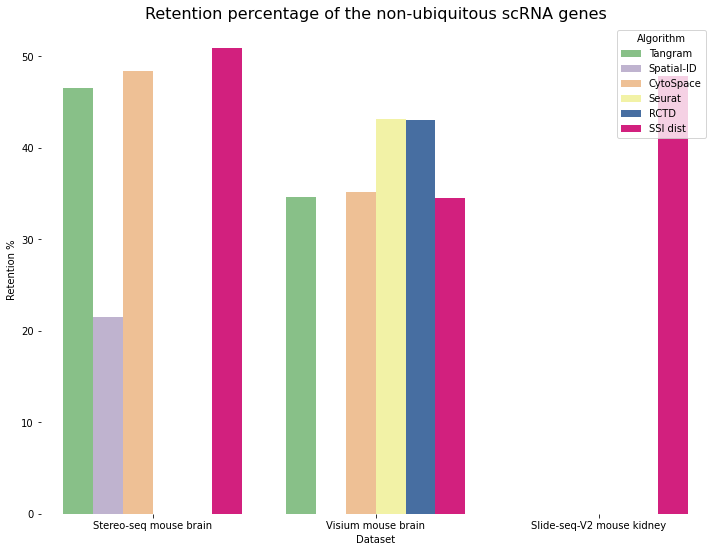

In [40]:
tools = ['Tangram', 'Spatial-ID', 'CytoSpace', 'Seurat', 'RCTD', 'SSI dist']
non_ubiquitous_L5 = [ 46.47, 21.46, 48.39, 0, 0, 50.9]
non_ubiquitous_visium = [ 34.6, 0, 35.13, 43.1, 43, 34.51]
non_ubiquitous_kidney = [0, 0, 0, 0, 0, 47.86]

data = pd.DataFrame(columns=['Algorithm', 'Dataset', 'Retention %'])
data.loc[:, 'Algorithm'] = tools * 3
data.loc[:, 'Dataset'] = ['Stereo-seq mouse brain'] * len(tools) + ['Visium mouse brain'] * len(tools) + ['Slide-seq-V2 mouse kidney'] * len(tools)
data.loc[:, 'Retention %'] = non_ubiquitous_L5 + non_ubiquitous_visium + non_ubiquitous_kidney

data

fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(data=data, x='Dataset', y='Retention %', hue='Algorithm', palette='Accent', ax=ax)
ax.set_frame_on(False)
plt.title('Retention percentage of the non-ubiquitous scRNA genes', size=16)
plt.savefig('non_ubiquitous.png', bbox_inches='tight', dpi=100)
